In [6]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [ ]:
# Download NLTK sentiment analyzer data
nltk.download('vader_lexicon')

In [2]:
news_df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')

In [3]:
# Define folder path and stock files
folder_path = '../data/raw/yfinance_data'
stock_df = {
    'AAPL': 'AAPL_historical_data.csv',
    'AMZN': 'AMZN_historical_data.csv',
    'GOOG': 'GOOG_historical_data.csv',
    'META': 'META_historical_data.csv',
    'MSFT': 'MSFT_historical_data.csv',
    'NVDA': 'NVDA_historical_data.csv',
    'TSLA': 'TSLA_historical_data.csv'
}



Processing AAPL data...


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,0.128348,NaN,0.000000,0.000000
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,0.124833,0.000000,-0.000150,-0.000083
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,0.120386,0.000000,-0.000468,-0.000241
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,0.118979,16.553131,-0.000501,-0.000329
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,0.118951,31.261854,-0.000375,-0.000343



Generating plots for AAPL...


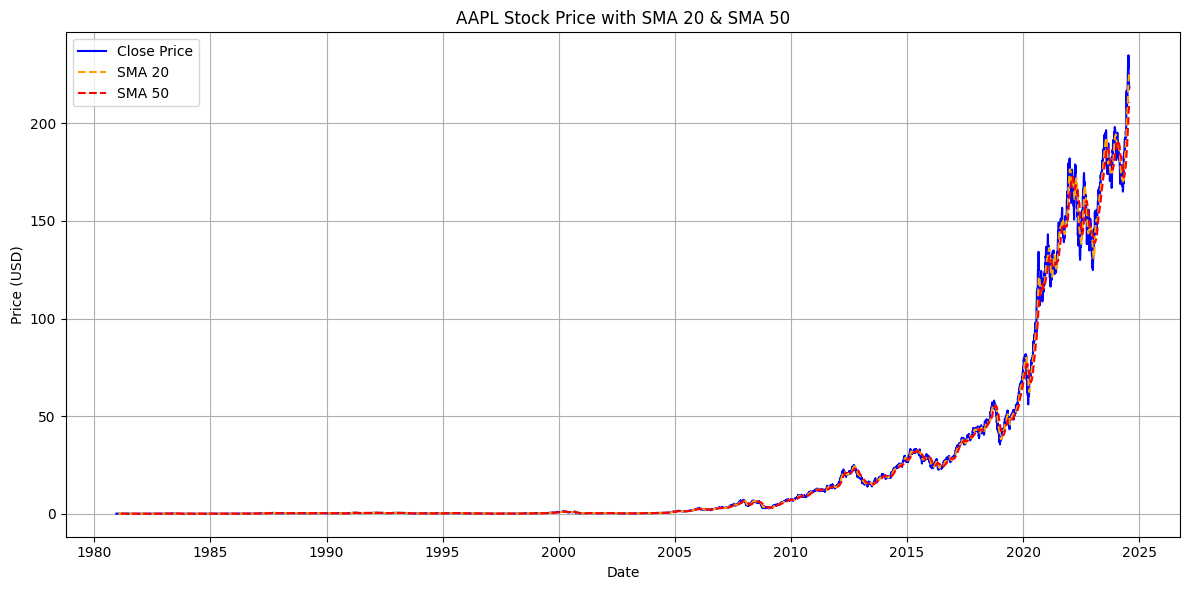

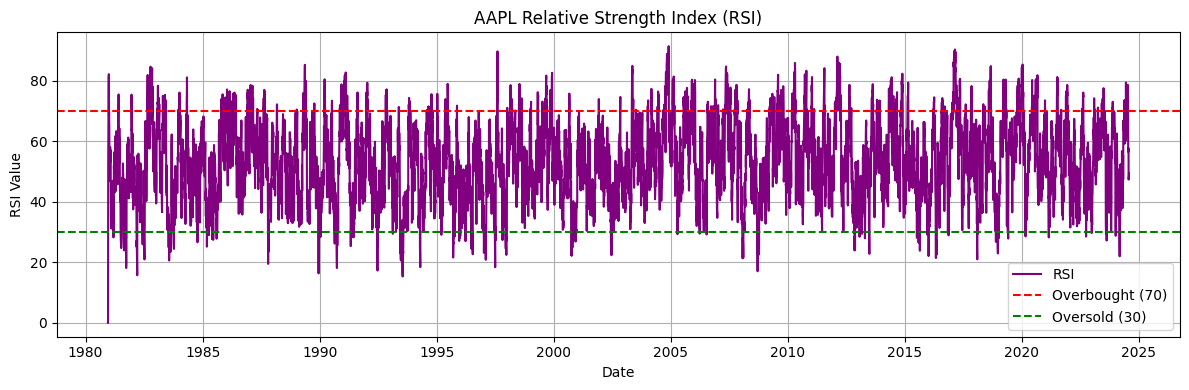

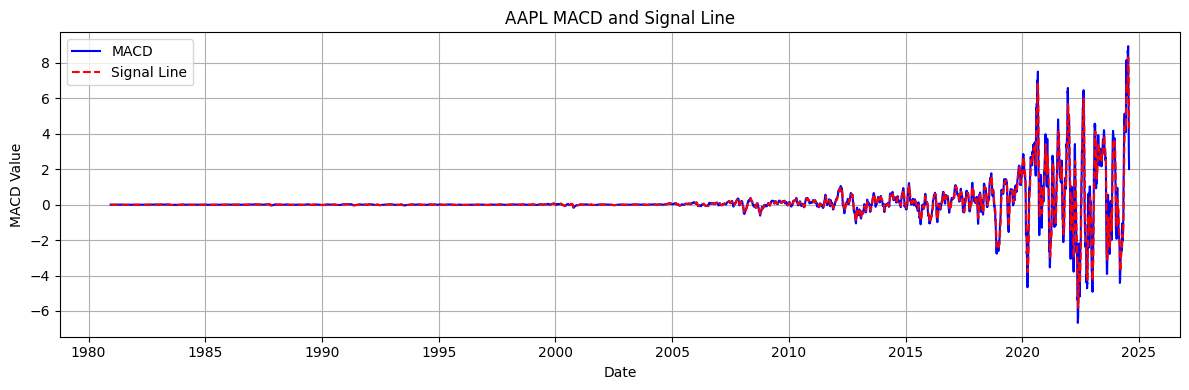

Processing AMZN data...


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,0.097917,NaN,0.000000,0.000000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,0.091901,0.0,-0.000257,-0.000143
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,0.089520,0.0,-0.000360,-0.000232
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,0.087283,0.0,-0.000529,-0.000333
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,0.083430,0.0,-0.001025,-0.000539



Generating plots for AMZN...


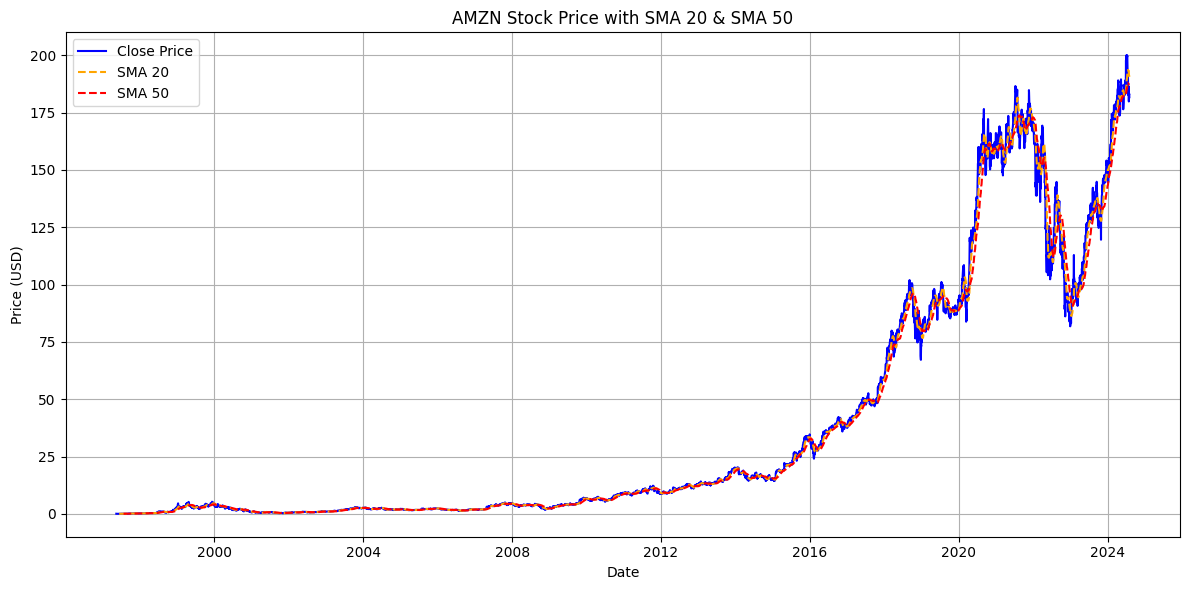

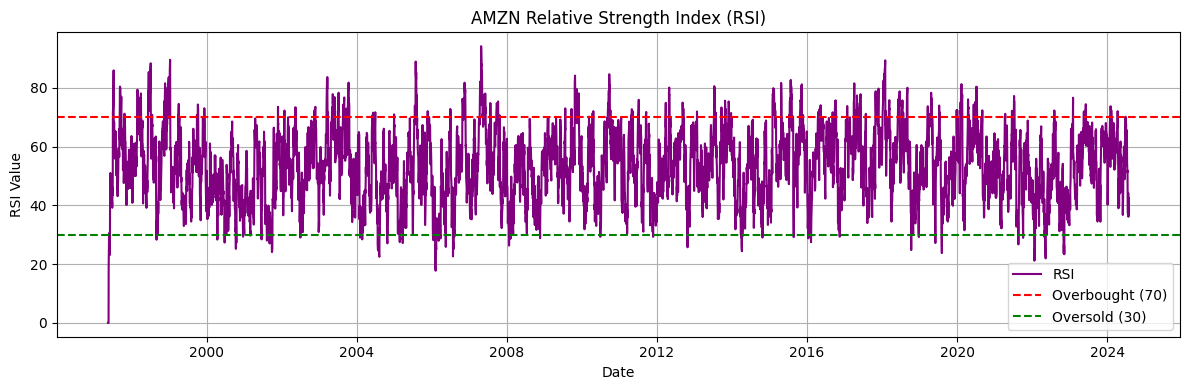

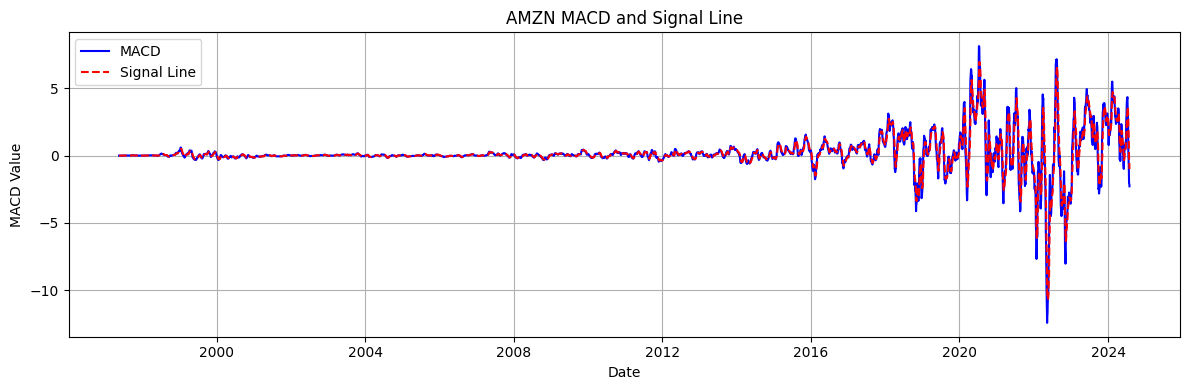

Processing GOOG data...


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,2.499133,NaN,0.000000,0.000000
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,2.603349,100.000000,0.004454,0.002474
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,2.647940,100.000000,0.006517,0.004131
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,2.637553,63.509605,0.003222,0.003823
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,2.638170,66.767252,0.002483,0.003424



Generating plots for GOOG...


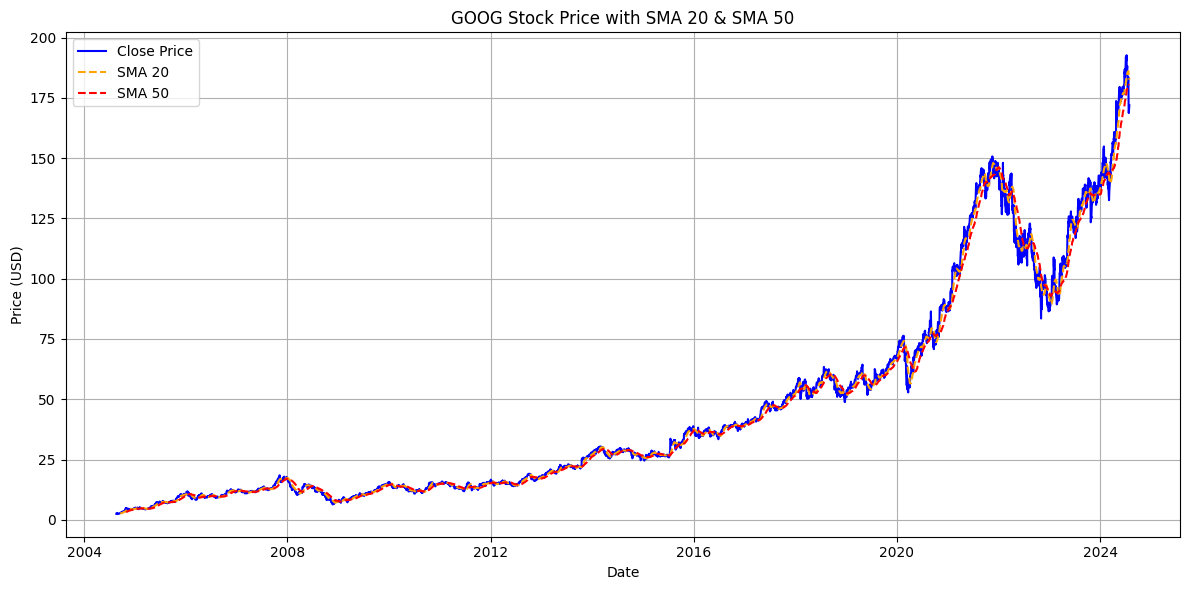

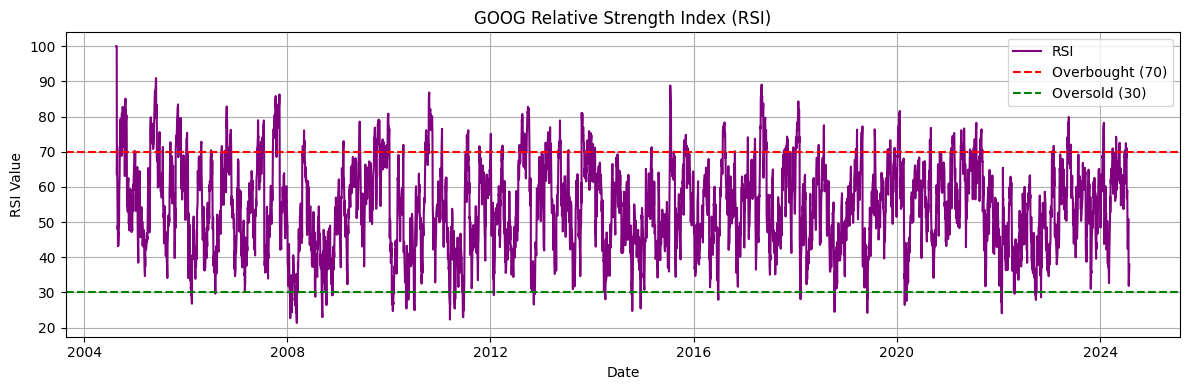

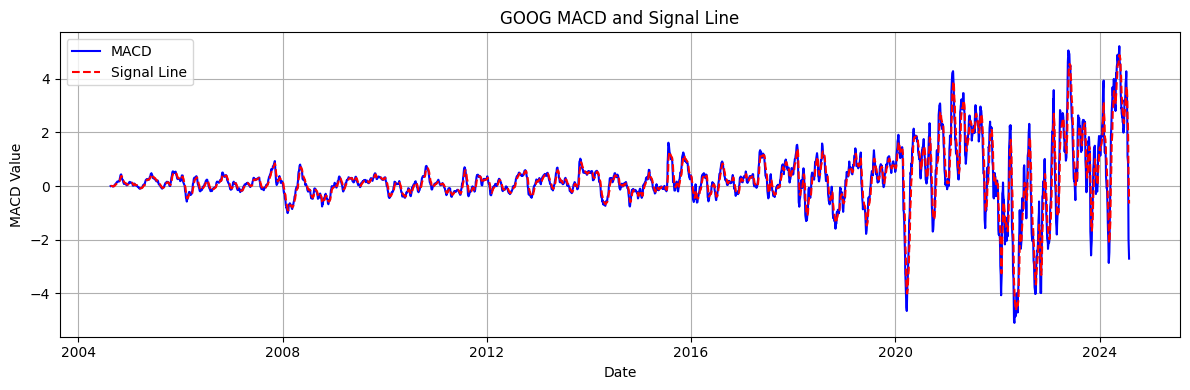

Processing META data...


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,NaN,NaN,27.580000,NaN,0.000000,0.000000
2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,NaN,NaN,27.926500,100.000000,0.014808,0.008226
2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,NaN,NaN,27.516528,29.999991,-0.025476,-0.005586
2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,NaN,NaN,27.295243,29.080195,-0.045340,-0.019053
2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,NaN,NaN,27.395569,53.595542,-0.016979,-0.018436



Generating plots for META...


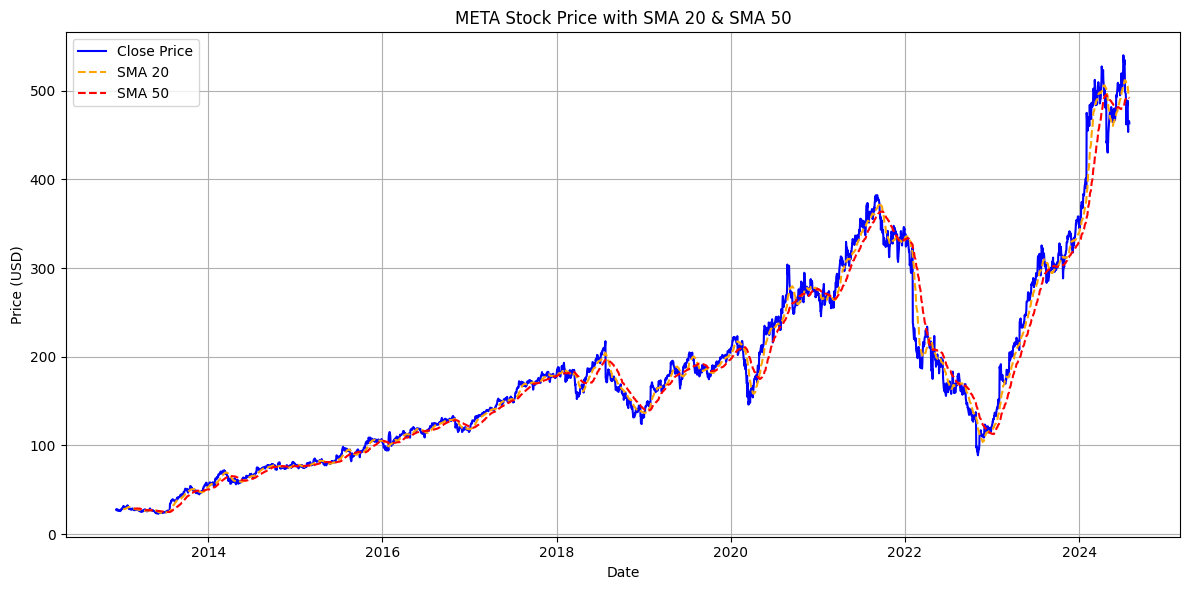

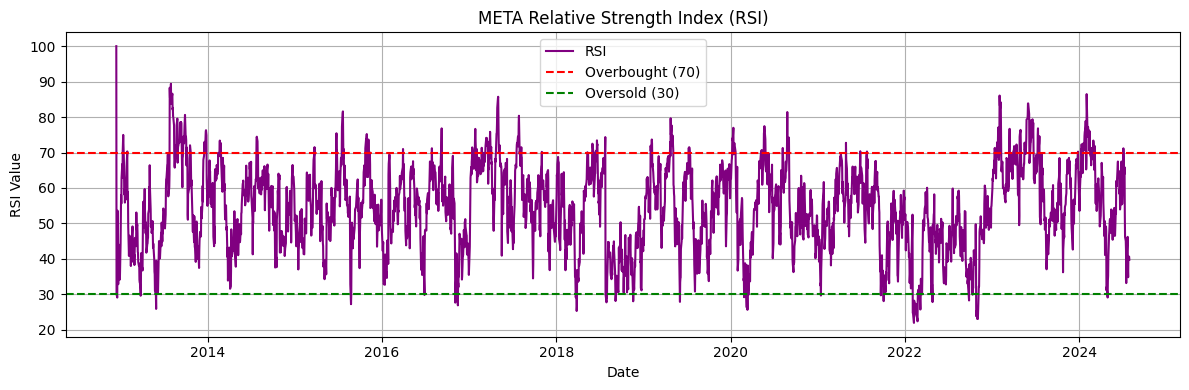

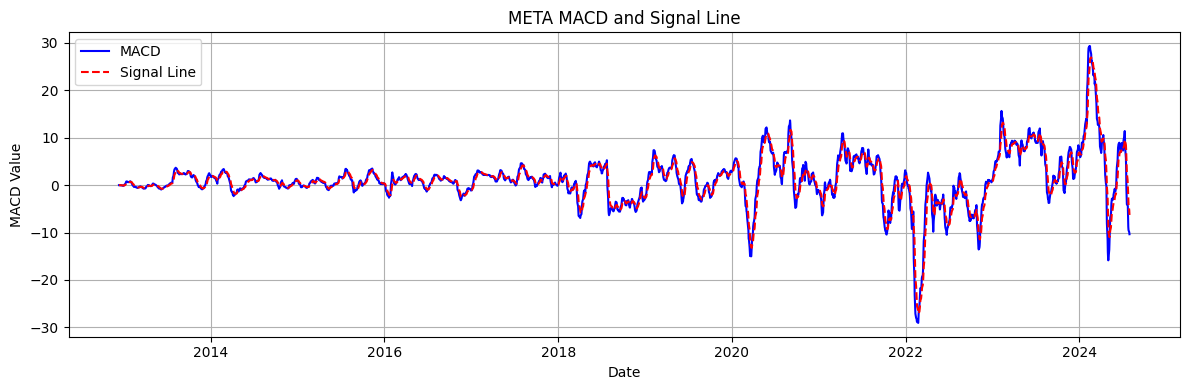

Processing MSFT data...


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN,NaN,0.097222,NaN,0.000000,0.000000
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,NaN,NaN,0.099045,100.000000,0.000078,0.000043
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,NaN,NaN,0.100288,100.000000,0.000153,0.000088
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,NaN,NaN,0.100155,63.877863,0.000090,0.000089
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,NaN,NaN,0.099655,50.727353,-0.000016,0.000058



Generating plots for MSFT...


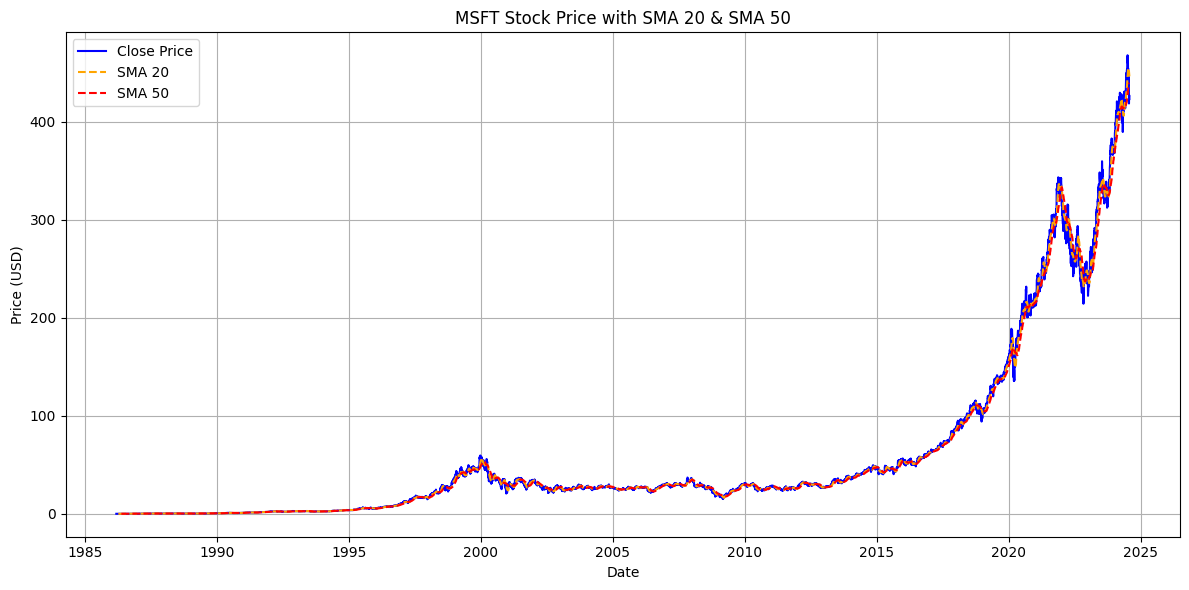

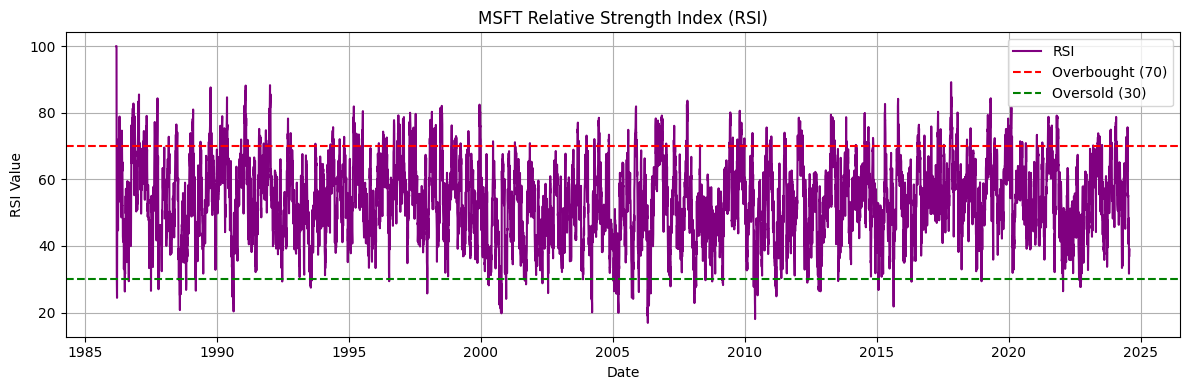

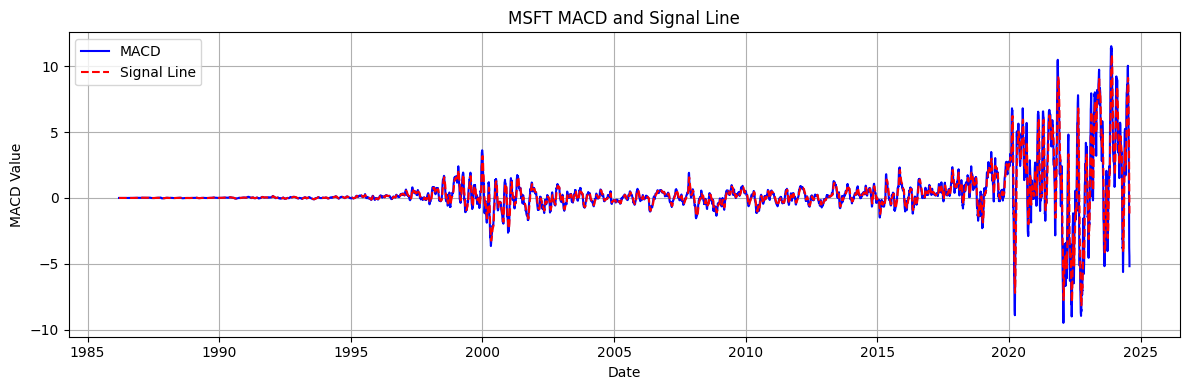

Processing NVDA data...


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NaN,NaN,0.041016,NaN,0.000000,0.000000
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,NaN,NaN,0.043272,100.000000,0.000096,0.000054
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,NaN,NaN,0.042730,53.157918,0.000014,0.000037
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,NaN,NaN,0.042423,52.184583,-0.000029,0.000015
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,NaN,NaN,0.042209,51.167868,-0.000057,-0.000006



Generating plots for NVDA...


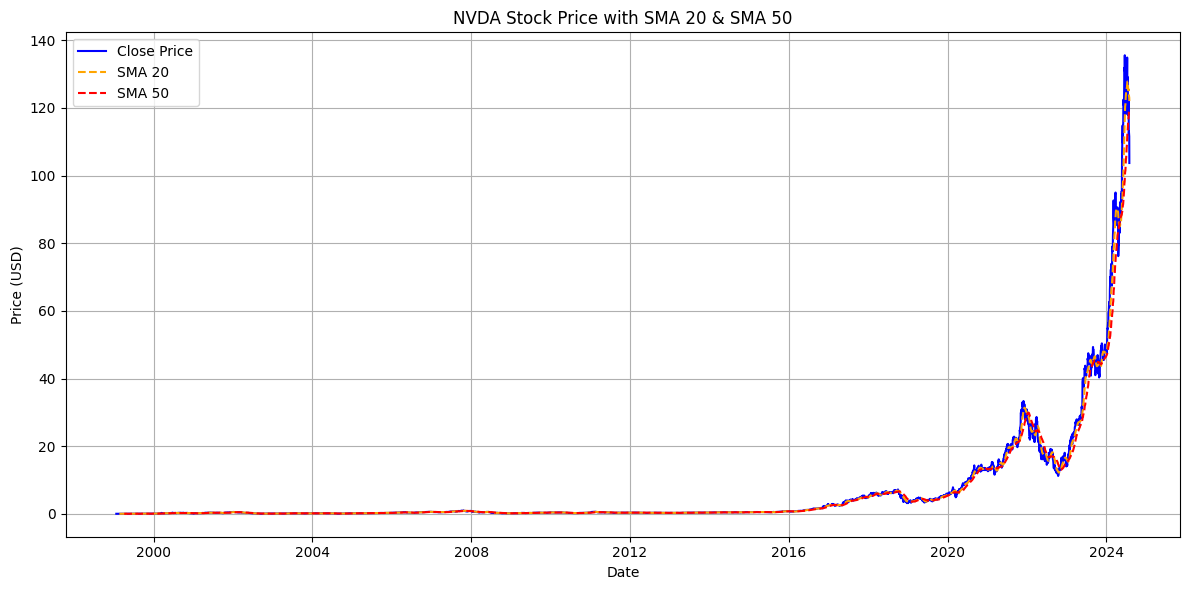

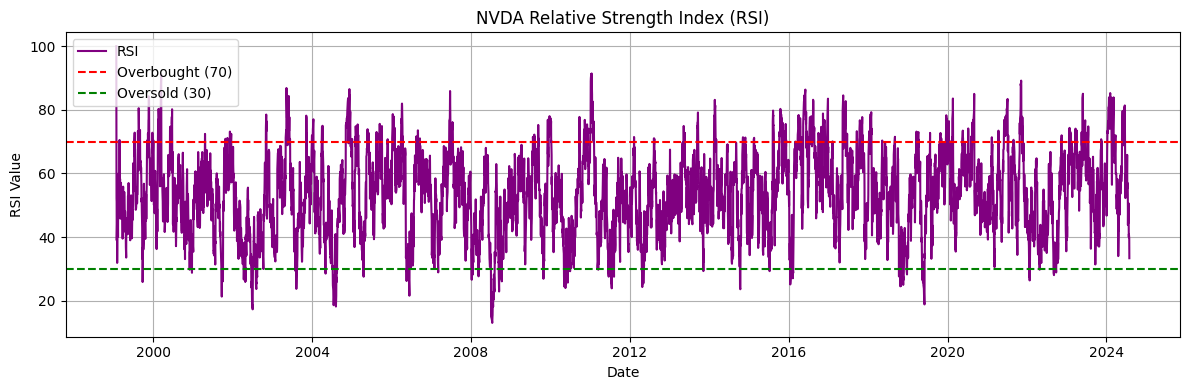

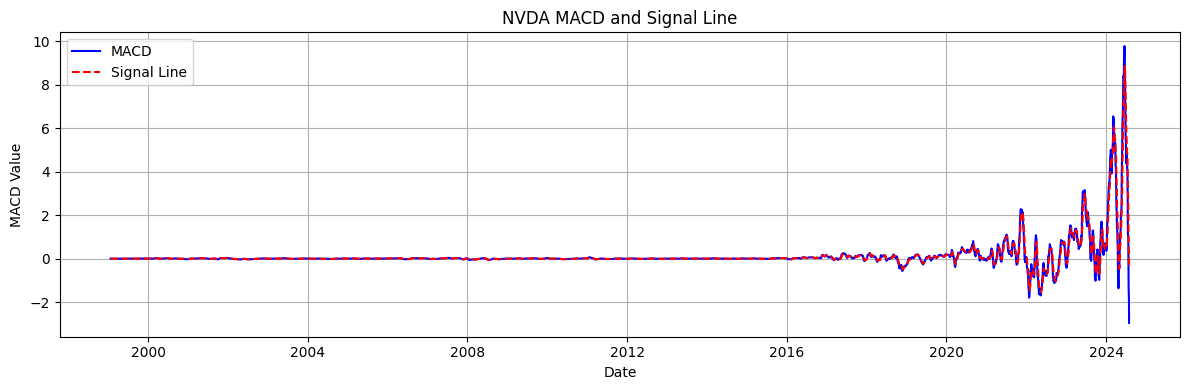

Processing TSLA data...


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,NaN,NaN,1.592667,NaN,0.000000,0.000000
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,NaN,NaN,1.590567,0.0,-0.000090,-0.000050
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,NaN,NaN,1.544092,0.0,-0.003980,-0.001661
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,NaN,NaN,1.467853,0.0,-0.012295,-0.005263
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,NaN,NaN,1.372583,0.0,-0.024752,-0.011061



Generating plots for TSLA...


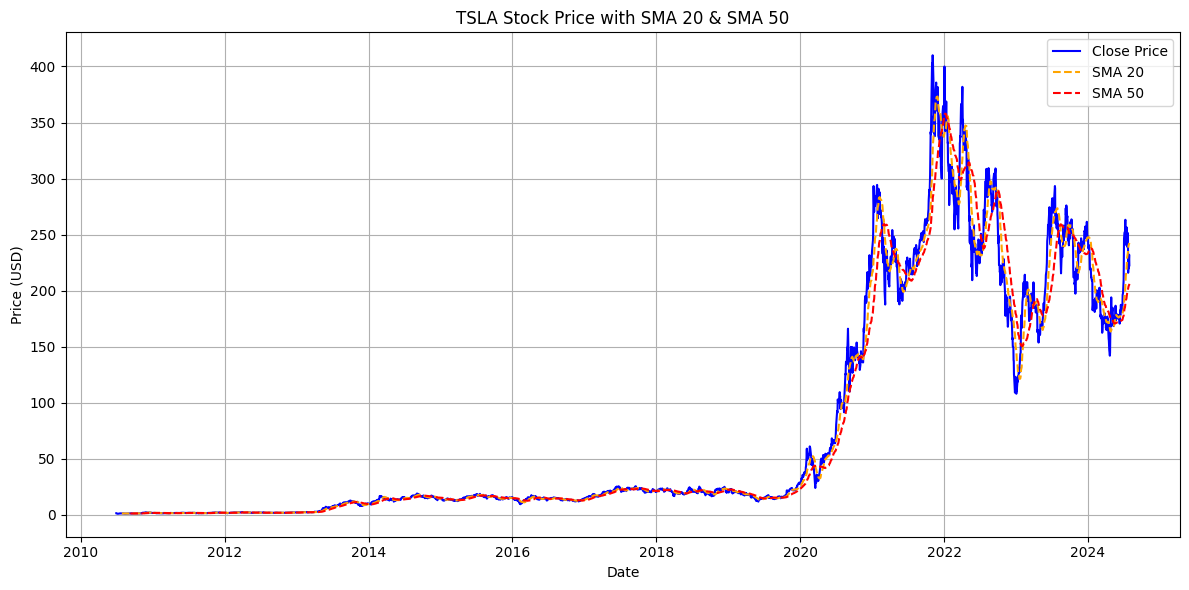

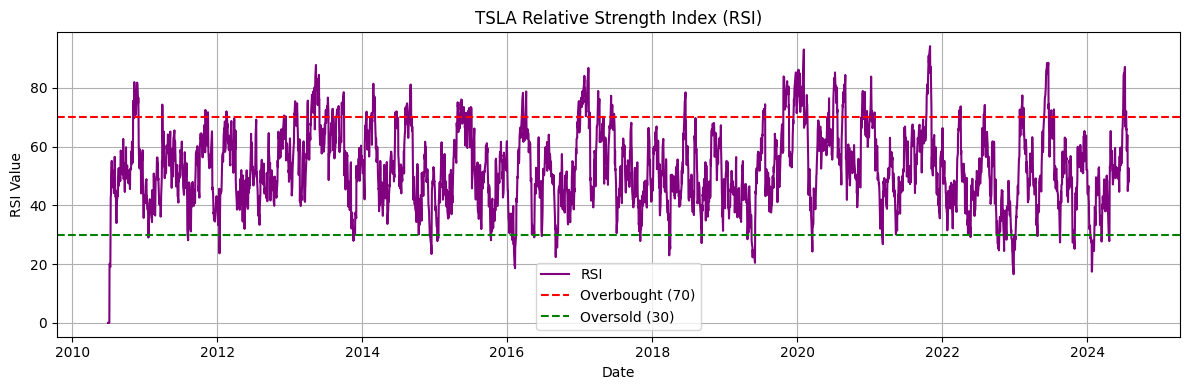

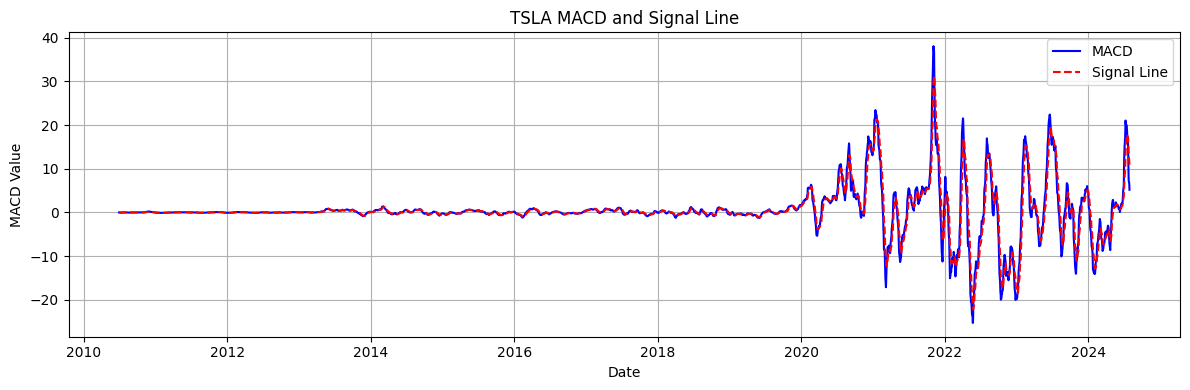


Analysis completed for all stocks!


In [7]:
# Function to load a single stock data
def load_stock_data(filepath):
    """
    Load stock data from CSV file into a DataFrame.
    Required Columns: Date, Open, High, Low, Close, Volume
    """
    data = pd.read_csv(filepath, parse_dates=["Date"])
    data.set_index("Date", inplace=True)
    return data


# Function to calculate technical indicators using Finta
def calculate_indicators(df):
    """
    Calculate technical indicators: SMA, EMA, RSI, and MACD.
    """
    df["SMA_20"] = TA.SMA(df, 20)  # Simple Moving Average - 20 days
    df["SMA_50"] = TA.SMA(df, 50)  # Simple Moving Average - 50 days
    df["EMA_20"] = TA.EMA(df, 20)  # Exponential Moving Average
    df["RSI"] = TA.RSI(df)         # Relative Strength Index
    macd = TA.MACD(df)             # MACD and Signal Line
    df["MACD"] = macd["MACD"]
    df["Signal_Line"] = macd["SIGNAL"]
    return df


# Function to plot stock data with technical indicators
def plot_stock_data(ticker, df):
    """
    Plot the stock price and indicators.
    """
    print(f"\nGenerating plots for {ticker}...")

    # Stock Price and Moving Averages Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Close"], label="Close Price", color="blue", linewidth=1.5)
    plt.plot(df.index, df["SMA_20"], label="SMA 20", color="orange", linestyle="--")
    plt.plot(df.index, df["SMA_50"], label="SMA 50", color="red", linestyle="--")
    plt.title(f"{ticker} Stock Price with SMA 20 & SMA 50")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # RSI Plot
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df["RSI"], label="RSI", color="purple")
    plt.axhline(70, color="red", linestyle="--", label="Overbought (70)")
    plt.axhline(30, color="green", linestyle="--", label="Oversold (30)")
    plt.title(f"{ticker} Relative Strength Index (RSI)")
    plt.xlabel("Date")
    plt.ylabel("RSI Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # MACD Plot
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df["MACD"], label="MACD", color="blue", linewidth=1.5)
    plt.plot(df.index, df["Signal_Line"], label="Signal Line", color="red", linestyle="--")
    plt.title(f"{ticker} MACD and Signal Line")
    plt.xlabel("Date")
    plt.ylabel("MACD Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Main function
def main():
    """
    Main function to iterate over stock files, calculate indicators, and visualize data.
    """
    for ticker, file in file_names.items():
        print(f"Processing {ticker} data...")

        # Load data
        file_path = os.path.join(folder_path, file)
        stock_data = load_stock_data(file_path)

        # Check if data is loaded correctly
        if stock_data.empty:
            print(f"Warning: No data found for {ticker}")
            continue

        # Calculate indicators
        stock_data = calculate_indicators(stock_data)

        # Display first 5 rows
        display(stock_data.head())

        # Plot stock data
        plot_stock_data(ticker, stock_data)

    print("\nAnalysis completed for all stocks!")


# Run the main function
main()

Check the distribution of articles over time: